In [1]:
#Loading the IMDB dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

2024-01-02 04:16:55.924018: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Encoding the integer sequence into binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension = int(10000)):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
from keras import models, layers, optimizers, losses, metrics

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.mse,
              metrics=[metrics.binary_accuracy])
trained_model = model.fit(x_train,y_train, epochs=4, batch_size=512,validation_data=(x_val, y_val))

2024-01-02 04:17:00.515325: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/4
49/49 [==============================] - 2s 42ms/step - loss: 0.1271 - binary_accuracy: 0.8193 - val_loss: 0.0939 - val_binary_accuracy: 0.8711
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.0672 - binary_accuracy: 0.9092 - val_loss: 0.0555 - val_binary_accuracy: 0.9271
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.0532 - binary_accuracy: 0.9317 - val_loss: 0.0319 - val_binary_accuracy: 0.9639
Epoch 4/4
49/49 [==============================] - 2s 33ms/step - loss: 0.0445 - binary_accuracy: 0.9438 - val_loss: 0.0521 - val_binary_accuracy: 0.9274


In [6]:
trained_model_dict = trained_model.history
trained_model_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

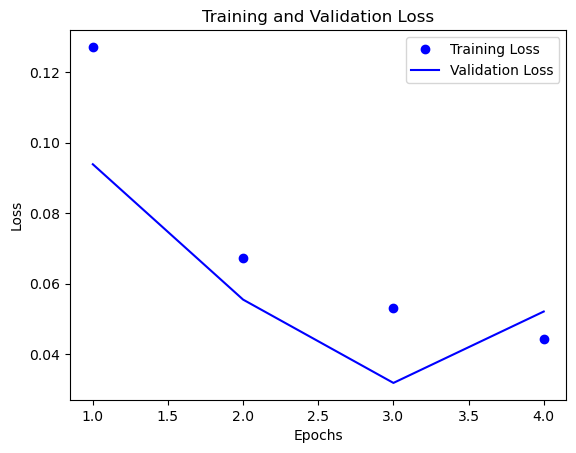

In [7]:
import matplotlib.pyplot as plt

loss_value = trained_model_dict['loss']
val_loss_value = trained_model_dict['val_loss']

epochs = range(1,len(loss_value)+1)

plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_value, 'b', label= 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

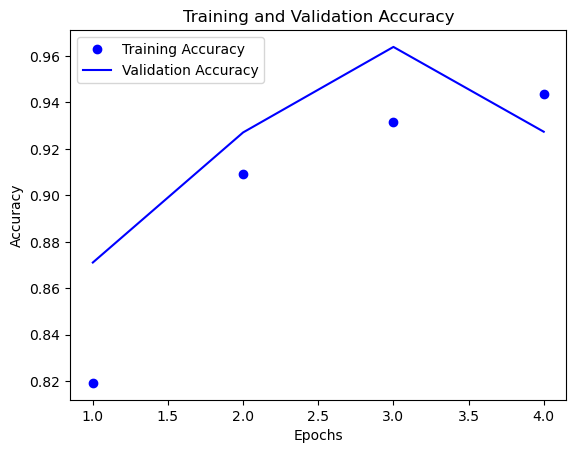

In [8]:
acc_values = trained_model_dict['binary_accuracy']
val_acc_values = trained_model_dict['val_binary_accuracy']


plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We can see validation loss and validation accuracy peaks at fourth epoch which shows even though accuracy and loss are decreasing in training set, it is overfitting data after third epoch

In [9]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.mse,
              metrics=[metrics.binary_accuracy])
trained_model = model.fit(x_train,y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/3
49/49 [==============================] - 2s 25ms/step - loss: 0.1309 - binary_accuracy: 0.8160
Epoch 2/3
49/49 [==============================] - 2s 43ms/step - loss: 0.0657 - binary_accuracy: 0.9136
Epoch 3/3
782/782 [==============================] - 4s 5ms/step - loss: 0.0934 - binary_accuracy: 0.8776


[0.09342329204082489, 0.8776000142097473]

In [10]:
model.predict(x_test)

: 